In [1]:
# Load required libraries and results from economic analysis functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

In [2]:
from modules.modelling_assumptions import field_10m_assum
from modules.modelling_assumptions import field_50m_assum
from modules.modelling_assumptions import field_100m_assum
from modules.modelling_assumptions import market_assumptions
from modules.modelling_assumptions import tax_assumptions
from modules.modelling_assumptions import tax_assumptions_autumn_epl
from modules.modelling_assumptions import tax_assumptions_delayed_autumn_epl
from modules.modelling_assumptions import tax_assumptions_delayed_summer_epl
from economic_analysis_class import calculate_economic_results
from economic_analysis_class import calculate_cashflow_results

In [3]:
# Add every font at the specified location
font_dir = ["C:\\Users\\artre\\Downloads\\Lato"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

font_dir = ["C:\\Users\\artre\\Downloads\\Roboto"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

In [4]:
# Plot parameters
mpl.rcParams['axes.titlesize'] = 14

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['xtick.labelcolor'] = 'grey'
mpl.rcParams['xtick.color'] = 'grey'

mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['ytick.labelcolor'] = 'grey'
mpl.rcParams['ytick.color'] = 'grey'

mpl.rcParams['axes.labelcolor'] = 'grey'
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['axes.edgecolor'] = 'grey'

mpl.rcParams['legend.fontsize'] = 8

mpl.rcParams['font.family'] = 'Lato'

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [5]:
color_base_line = '#003f5c'
color_highlight_red = '#bc5090'
color_highlight_purple = '#58508d'
color_highlight_orangered = '#ff6361'

In [6]:
# %% Get results for analysis and plotting

# Important assumptions that need to be set out in the paper.
# The original EPL began May 2022 and was to finish Dec 2025, the new EPL extends until March 2028
# For simplicty and because the model runs in years I assum orginal EPL lasts 4 years (2022-2025) assuming it
# includes all of 2022.
# For the new EPL it is 6 years, only two are added (2022-2027) this is to avid adjustments to first quarters of 2022
# and 2028; the net impact will not be meaningful as we are assume 5 more months in 2022 and 3 less of 2028.
# See EPL factsheet for more details
# https://www.gov.uk/government/publications/changes-to-the-energy-oil-and-gas-profits-levy/energy-oil-and-gas-profits-levy

field_assumptions = field_10m_assum
results_small_field = calculate_economic_results(field_assumptions=field_assumptions,
                                                 market_assumptions=market_assumptions,
                                                 tax_assumptions=tax_assumptions,
                                                 tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                 tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                 tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_50m_assum
results_medium_field = calculate_economic_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_100m_assum
results_large_field = calculate_economic_results(field_assumptions=field_assumptions,
                                                 market_assumptions=market_assumptions,
                                                 tax_assumptions=tax_assumptions,
                                                 tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                 tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                 tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_10m_assum
cashflow_small_field = calculate_cashflow_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_50m_assum
cashflow_medium_field = calculate_cashflow_results(field_assumptions=field_assumptions,
                                                   market_assumptions=market_assumptions,
                                                   tax_assumptions=tax_assumptions,
                                                   tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                   tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                   tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

field_assumptions = field_100m_assum
cashflow_large_field = calculate_cashflow_results(field_assumptions=field_assumptions,
                                                  market_assumptions=market_assumptions,
                                                  tax_assumptions=tax_assumptions,
                                                  tax_assumptions_autumn_epl=tax_assumptions_autumn_epl,
                                                  tax_assumptions_delayed_summer_epl=tax_assumptions_delayed_summer_epl,
                                                  tax_assumptions_delayed_autumn_epl=tax_assumptions_delayed_autumn_epl)

# Impact of EPL on delayed startup

## NPV table

In [7]:
results_small_field['npv_results'].keys()

Index(['Pre tax', 'Post tax no EPL other income',
       'Post tax EPL summer other income', 'Post tax EPL autumn other income',
       'Post tax EPL summer 2019 start other income',
       'Post tax EPL autumn 2019 start other income',
       'Post tax no EPL no other income',
       'Post tax EPL summer no other income',
       'Post tax EPL autumn no other income',
       'Post tax EPL summer 2019 start no other income',
       'Post tax EPL autumn 2019 start no other income'],
      dtype='object')

In [8]:
# Post tax NPV, only analyze case where there is other income available

s_summer =results_small_field['npv_results']['Post tax EPL summer other income']
s_summer2019 = results_small_field['npv_results']['Post tax EPL summer 2019 start no other income']

s_autumn = results_small_field['npv_results']['Post tax EPL autumn other income']
s_autumn2019 = results_small_field['npv_results']['Post tax EPL autumn 2019 start no other income']

m_summer =results_medium_field['npv_results']['Post tax EPL summer other income']
m_summer2019 = results_medium_field['npv_results']['Post tax EPL summer 2019 start no other income']

m_autumn = results_medium_field['npv_results']['Post tax EPL autumn other income']
m_autumn2019 = results_medium_field['npv_results']['Post tax EPL autumn 2019 start no other income']

l_summer =results_large_field['npv_results']['Post tax EPL summer other income']
l_summer2019 = results_large_field['npv_results']['Post tax EPL summer 2019 start no other income']

l_autumn = results_large_field['npv_results']['Post tax EPL autumn other income']
l_autumn2019 = results_large_field['npv_results']['Post tax EPL autumn 2019 start no other income']


data = np.array([[s_summer2019, s_summer, s_autumn2019, s_autumn],
                 [m_summer2019, m_summer, m_autumn2019, m_autumn],
                 [l_summer2019, l_summer, l_autumn2019, l_autumn]], np.int32)

arrays = [["EPL 1", "EPL 1", "EPL 2", "EPL 2"], ['2019 start', '2022 start', '2019 start', '2022 start']]
columns = pd.MultiIndex.from_arrays(arrays, names=('EPL case', 'Start-up year'))

table = pd.DataFrame(data, index = ["Field 1 - Small", "Field 2 - Medium", "Field 3 - Large"],
             columns = columns)
table.index.name = "Fields"
table

EPL case              EPL 1                 EPL 2           
Start-up year    2019 start 2022 start 2019 start 2022 start
Fields                                                      
Field 1 - Small          51        117         31         69
Field 2 - Medium        338        796        184        570
Field 3 - Large         633       1368        321        998

## Cashflow plots

In [9]:
cashflow_medium_field.keys()

Index(['Pre tax', 'Post tax no EPL other income',
       'Post tax EPL summer other income', 'Post tax EPL autumn other income',
       'Post tax EPL summer 2019 start other income',
       'Post tax EPL autumn 2019 start other income',
       'Post tax no EPL no other income',
       'Post tax EPL summer no other income',
       'Post tax EPL autumn no other income',
       'Post tax EPL summer 2019 start no other income',
       'Post tax EPL autumn 2019 start no other income'],
      dtype='object')

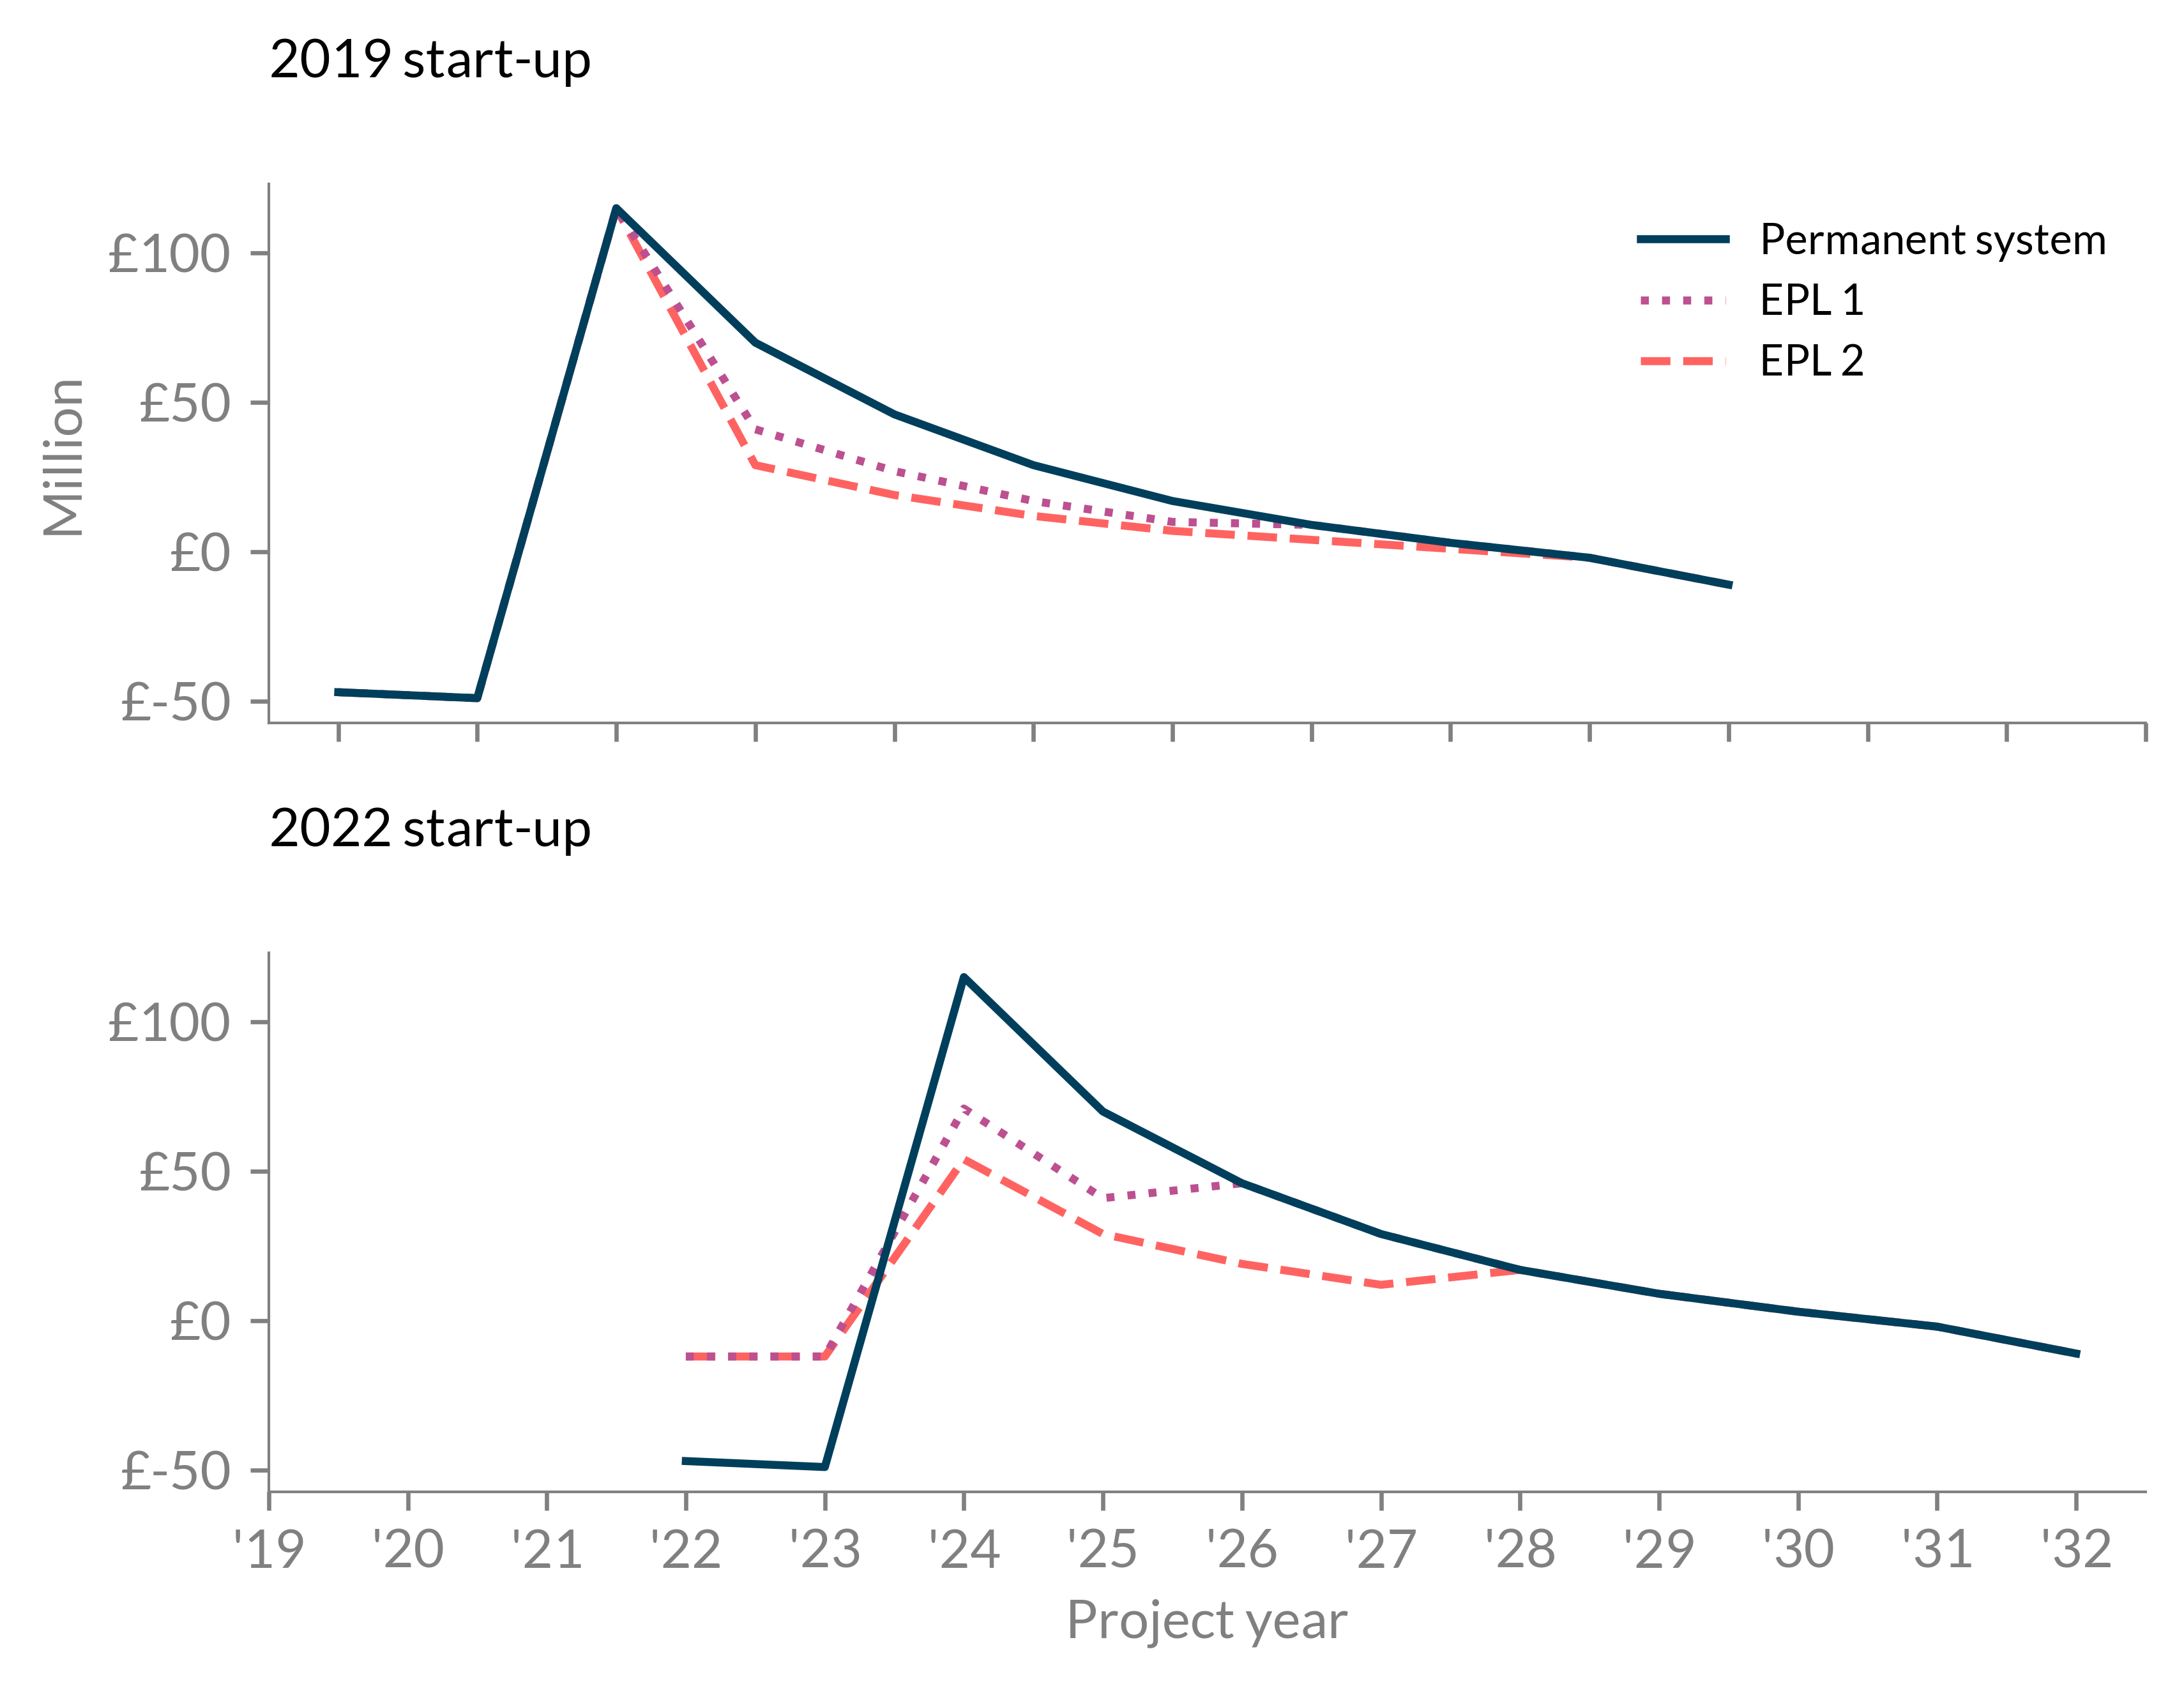

In [88]:
# Get relevant cashflows, create correct indexes for different startup years, then merge to plot

summer = cashflow_small_field['Post tax EPL summer other income']['post_tax_ncf']
autumn = cashflow_small_field['Post tax EPL autumn other income']['post_tax_ncf']

summer2019 = cashflow_small_field['Post tax EPL summer 2019 start other income']['post_tax_ncf']
autumn2019 = cashflow_small_field['Post tax EPL autumn 2019 start other income']['post_tax_ncf']

index2019 = pd.RangeIndex(start = 2019, stop = 2019 + len(summer2019))
index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(summer2019))

summer.index = index2022
autumn.index = index2022

summer2019.index = index2019
autumn2019.index = index2019

permanent = cashflow_small_field['Post tax no EPL other income']['post_tax_ncf'].values
permanent2019 = cashflow_small_field['Post tax no EPL other income']['post_tax_ncf'].values

permanent = pd.Series(permanent, index=index2022)
permanent2019 = pd.Series(permanent2019, index=index2019)


df = pd.concat([permanent, summer, autumn, permanent2019, summer2019, autumn2019], axis=1, sort=True)
df.columns = ['Permanent_2022', 'EPL1_2022', 'EPL2_2022', 'Permanent_2019', 'EPL1_2019', 'EPL2_2019']
df.index = df.index.map(str)

fig, (ax1,ax2) =plt.subplots(nrows=2, figsize=(5.8, 4.5), dpi=600, tight_layout=True, sharey=True)

ax1.plot(df['EPL2_2019'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax1.plot(df['EPL1_2019'], label='EPL 1', c=color_highlight_red, ls=':')
ax1.plot(df['Permanent_2019'], label='Permanent system', color=color_base_line)

ax2.plot(df['EPL2_2022'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax2.plot(df['EPL1_2022'], label="EPL 1", c=color_highlight_red, ls=':')
ax2.plot(df['Permanent_2022'], label='Permanent system', color=color_base_line)

ax1.set_title("2019 start-up", size=10, loc='left', pad=20)
ax2.set_title("2022 start-up", size=10, loc='left', pad=20)

ax2.set_xlabel("Project year")
ax1.set_ylabel("Million")

ax1.yaxis.set_major_formatter('£{x:1.0f}')
ax2.yaxis.set_major_formatter('£{x:1.0f}')

x_labels = [str("'" + year[2:4]) for year in df.index]
ax1.set_xticks(ticks = df.index, labels = "")
ax2.set_xticks(ticks = df.index, labels = x_labels)

# Legend styling
h, l = ax1.get_legend_handles_labels()
ax1.legend(handles=[h[2], h[1], h[0]], labels=[l[2], l[1], l[0]], frameon=False, loc='upper right')


fig.subplots_adjust(hspace=5)
plt.show()

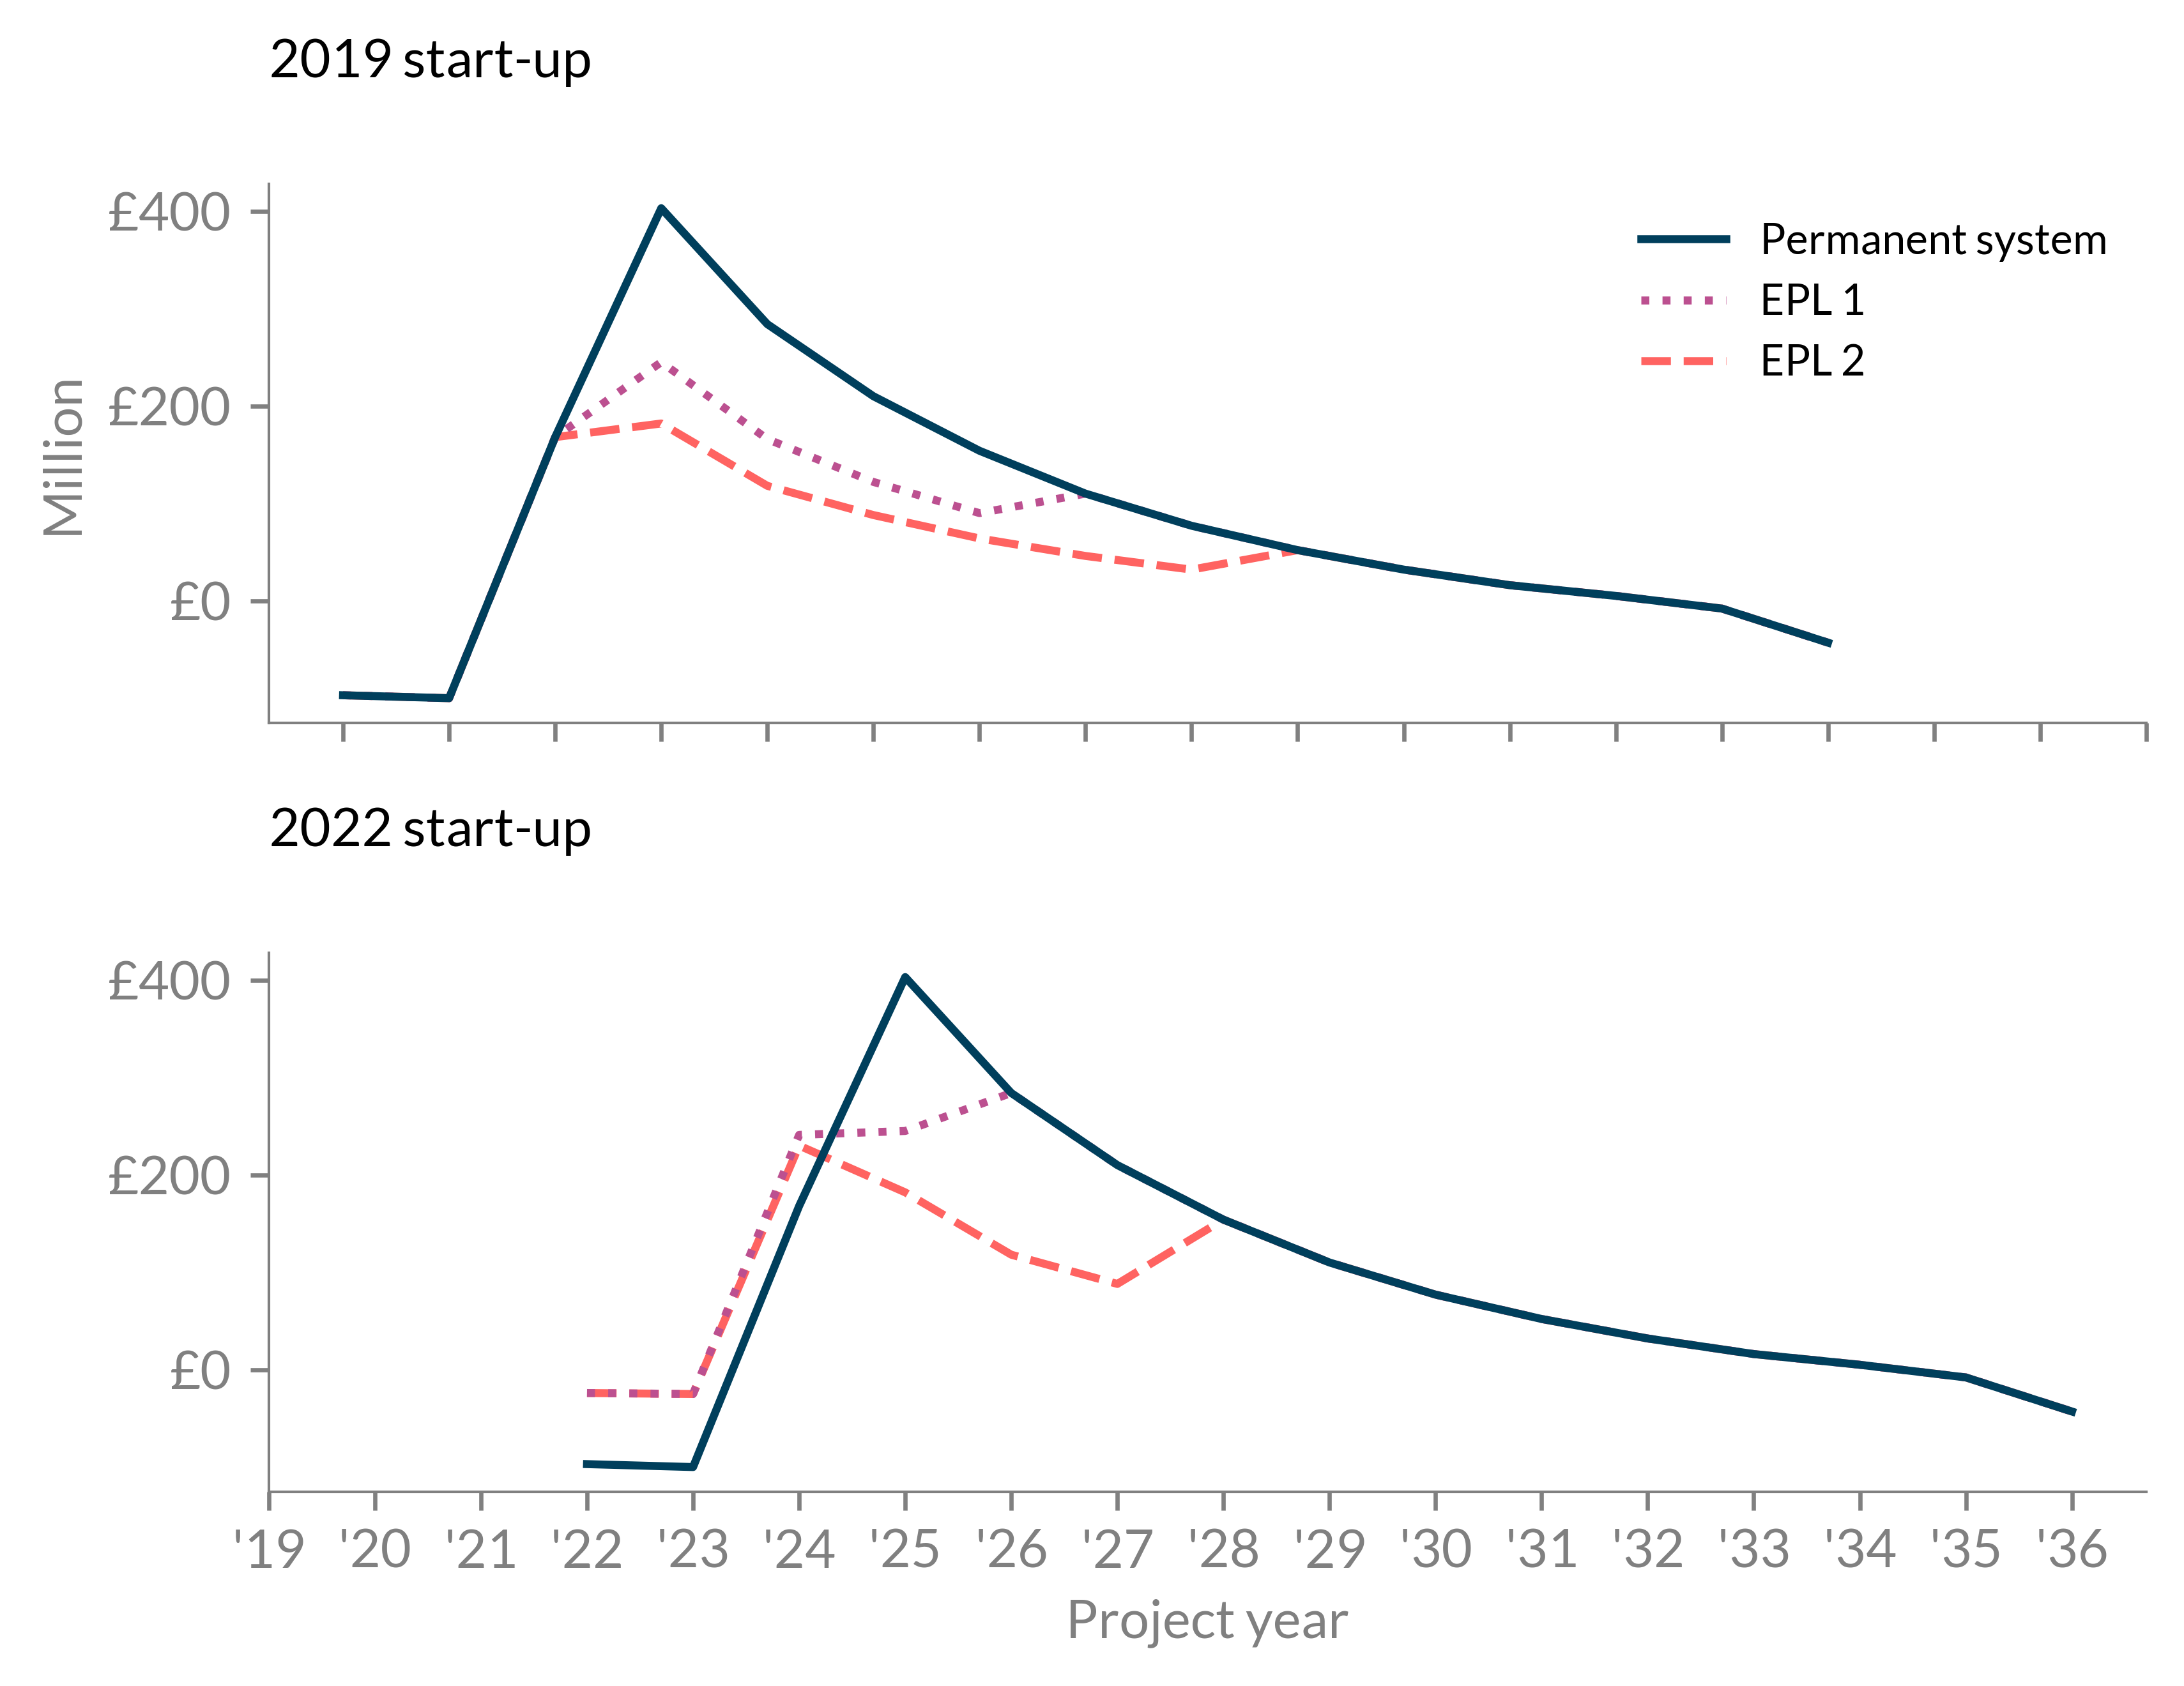

In [85]:
summer = cashflow_medium_field['Post tax EPL summer other income']['post_tax_ncf']
autumn = cashflow_medium_field['Post tax EPL autumn other income']['post_tax_ncf']

summer2019 = cashflow_medium_field['Post tax EPL summer 2019 start other income']['post_tax_ncf']
autumn2019 = cashflow_medium_field['Post tax EPL autumn 2019 start other income']['post_tax_ncf']

index2019 = pd.RangeIndex(start = 2019, stop = 2019 + len(summer2019))
index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(summer2019))

summer.index = index2022
autumn.index = index2022

summer2019.index = index2019
autumn2019.index = index2019

permanent = cashflow_medium_field['Post tax no EPL other income']['post_tax_ncf'].values
permanent2019 = cashflow_medium_field['Post tax no EPL other income']['post_tax_ncf'].values

permanent = pd.Series(permanent, index=index2022)
permanent2019 = pd.Series(permanent2019, index=index2019)


df = pd.concat([permanent, summer, autumn, permanent2019, summer2019, autumn2019], axis=1, sort=True)
df.columns = ['Permanent_2022', 'EPL1_2022', 'EPL2_2022', 'Permanent_2019', 'EPL1_2019', 'EPL2_2019']
df.index = df.index.map(str)

fig, (ax1,ax2) =plt.subplots(nrows=2, figsize=(5.8, 4.5), dpi=600, tight_layout=True, sharey=True)

ax1.plot(df['EPL2_2019'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax1.plot(df['EPL1_2019'], label='EPL 1', c=color_highlight_red, ls=':')
ax1.plot(df['Permanent_2019'], label='Permanent system', color=color_base_line)

ax2.plot(df['EPL2_2022'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax2.plot(df['EPL1_2022'], label="EPL 1", c=color_highlight_red, ls=':')
ax2.plot(df['Permanent_2022'], label='Permanent system', color=color_base_line)

ax1.set_title("2019 start-up", size=10, loc='left', pad=20)
ax2.set_title("2022 start-up", size=10, loc='left', pad=20)

ax2.set_xlabel("Project year")
ax1.set_ylabel("Million")

ax1.yaxis.set_major_formatter('£{x:1.0f}')
ax2.yaxis.set_major_formatter('£{x:1.0f}')

x_labels = [str("'" + year[2:4]) for year in df.index]
ax1.set_xticks(ticks = df.index, labels = "")
ax2.set_xticks(ticks = df.index, labels = x_labels)

# Legend styling
h, l = ax1.get_legend_handles_labels()
ax1.legend(handles=[h[2], h[1], h[0]], labels=[l[2], l[1], l[0]], frameon=False, loc='upper right')


fig.subplots_adjust(hspace=5)
plt.show()

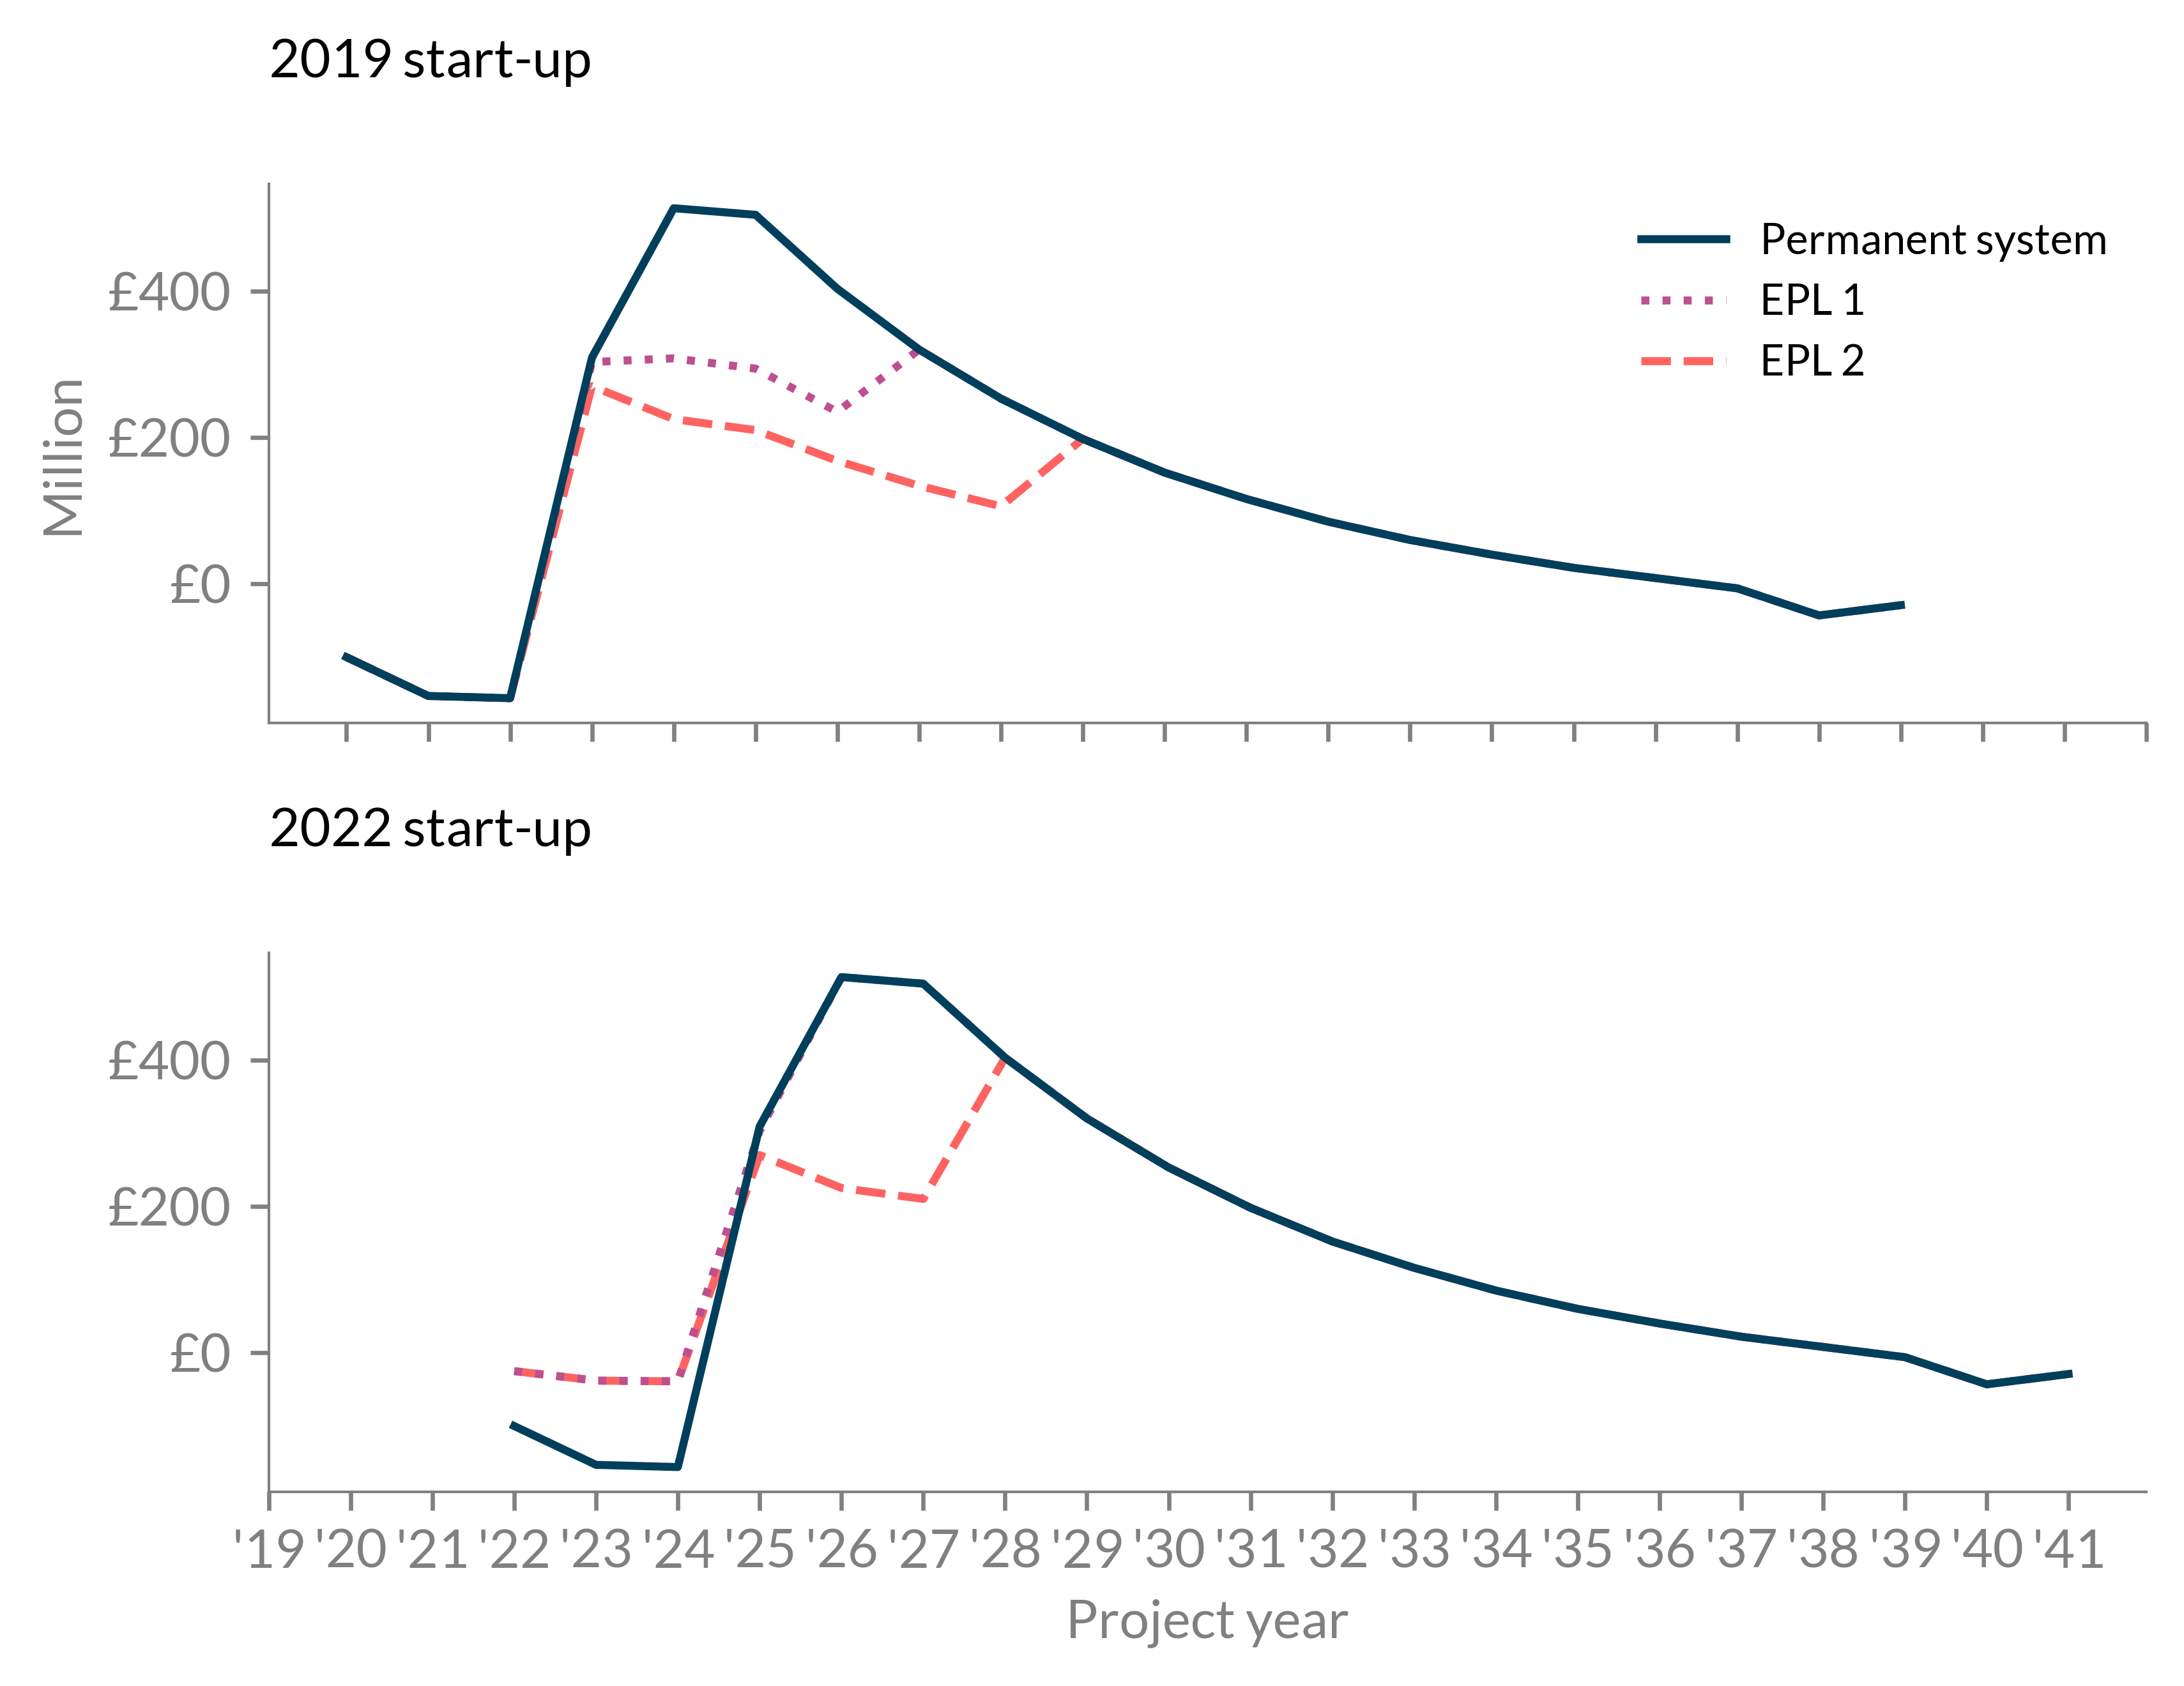

In [86]:
summer = cashflow_large_field['Post tax EPL summer other income']['post_tax_ncf']
autumn = cashflow_large_field['Post tax EPL autumn other income']['post_tax_ncf']

summer2019 = cashflow_large_field['Post tax EPL summer 2019 start other income']['post_tax_ncf']
autumn2019 = cashflow_large_field['Post tax EPL autumn 2019 start other income']['post_tax_ncf']

index2019 = pd.RangeIndex(start = 2019, stop = 2019 + len(summer2019))
index2022 = pd.RangeIndex(start = 2022, stop = 2022 + len(summer2019))

summer.index = index2022
autumn.index = index2022

summer2019.index = index2019
autumn2019.index = index2019

permanent = cashflow_large_field['Post tax no EPL other income']['post_tax_ncf'].values
permanent2019 = cashflow_large_field['Post tax no EPL other income']['post_tax_ncf'].values

permanent = pd.Series(permanent, index=index2022)
permanent2019 = pd.Series(permanent2019, index=index2019)


df = pd.concat([permanent, summer, autumn, permanent2019, summer2019, autumn2019], axis=1, sort=True)
df.columns = ['Permanent_2022', 'EPL1_2022', 'EPL2_2022', 'Permanent_2019', 'EPL1_2019', 'EPL2_2019']
df.index = df.index.map(str)

fig, (ax1,ax2) =plt.subplots(nrows=2, figsize=(5.8, 4.5), dpi=600, tight_layout=True, sharey=True)

ax1.plot(df['EPL2_2019'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax1.plot(df['EPL1_2019'], label='EPL 1', c=color_highlight_red, ls=':')
ax1.plot(df['Permanent_2019'], label='Permanent system', color=color_base_line)

ax2.plot(df['EPL2_2022'], label='EPL 2', c=color_highlight_orangered, ls='--')
ax2.plot(df['EPL1_2022'], label="EPL 1", c=color_highlight_red, ls=':')
ax2.plot(df['Permanent_2022'], label='Permanent system', color=color_base_line)

ax1.set_title("2019 start-up", size=10, loc='left', pad=20)
ax2.set_title("2022 start-up", size=10, loc='left', pad=20)

ax2.set_xlabel("Project year")
ax1.set_ylabel("Million")

ax1.yaxis.set_major_formatter('£{x:1.0f}')
ax2.yaxis.set_major_formatter('£{x:1.0f}')

x_labels = [str("'" + year[2:4]) for year in df.index]
ax1.set_xticks(ticks = df.index, labels = "")
ax2.set_xticks(ticks = df.index, labels = x_labels)

# Legend styling
h, l = ax1.get_legend_handles_labels()
ax1.legend(handles=[h[2], h[1], h[0]], labels=[l[2], l[1], l[0]], frameon=False, loc='upper right')


fig.subplots_adjust(hspace=5)
plt.show()

In [87]:
df

,Permanent_2022,EPL1_2022,EPL2_2022,Permanent_2019,EPL1_2019,EPL2_2019
2019,NaN,NaN,NaN,-100.0,-100.0,-100.0
2020,NaN,NaN,NaN,-153.0,-153.0,-153.0
2021,NaN,NaN,NaN,-156.0,-156.0,-156.0
2022,-100.0,-25.0,-25.0,309.0,303.0,270.0
2023,-153.0,-38.0,-38.0,513.0,308.0,225.0
2024,-156.0,-39.0,-39.0,504.0,294.0,210.0
2025,309.0,303.0,270.0,403.0,235.0,168.0
2026,513.0,513.0,225.0,320.0,320.0,134.0
2027,504.0,504.0,210.0,253.0,253.0,106.0
2028,403.0,403.0,403.0,198.0,198.0,198.0


## For LinkedIn

# Impact on cashflows

In [10]:
# Plot cashflows and check 
cashflow_medium_field.keys()

Index(['Pre tax', 'Post tax no EPL other income',
       'Post tax EPL summer other income', 'Post tax EPL autumn other income',
       'Post tax EPL autumn 2019 start other income',
       'Post tax no EPL no other income',
       'Post tax EPL summer no other income',
       'Post tax EPL autumn no other income',
       'Post tax EPL autumn 2019 start no other income'],
      dtype='object')

In [7]:
pre_tax = cashflow_medium_field['Pre tax'].ncf
tax1 = cashflow_medium_field['Post tax no EPL other income'].post_tax_ncf
tax2 = cashflow_medium_field['Post tax EPL summer other income'].post_tax_ncf
tax3 = cashflow_medium_field['Post tax EPL autumn other income'].post_tax_ncf
tax4 = cashflow_medium_field['Post tax EPL autumn 2019 start other income'].post_tax_ncf


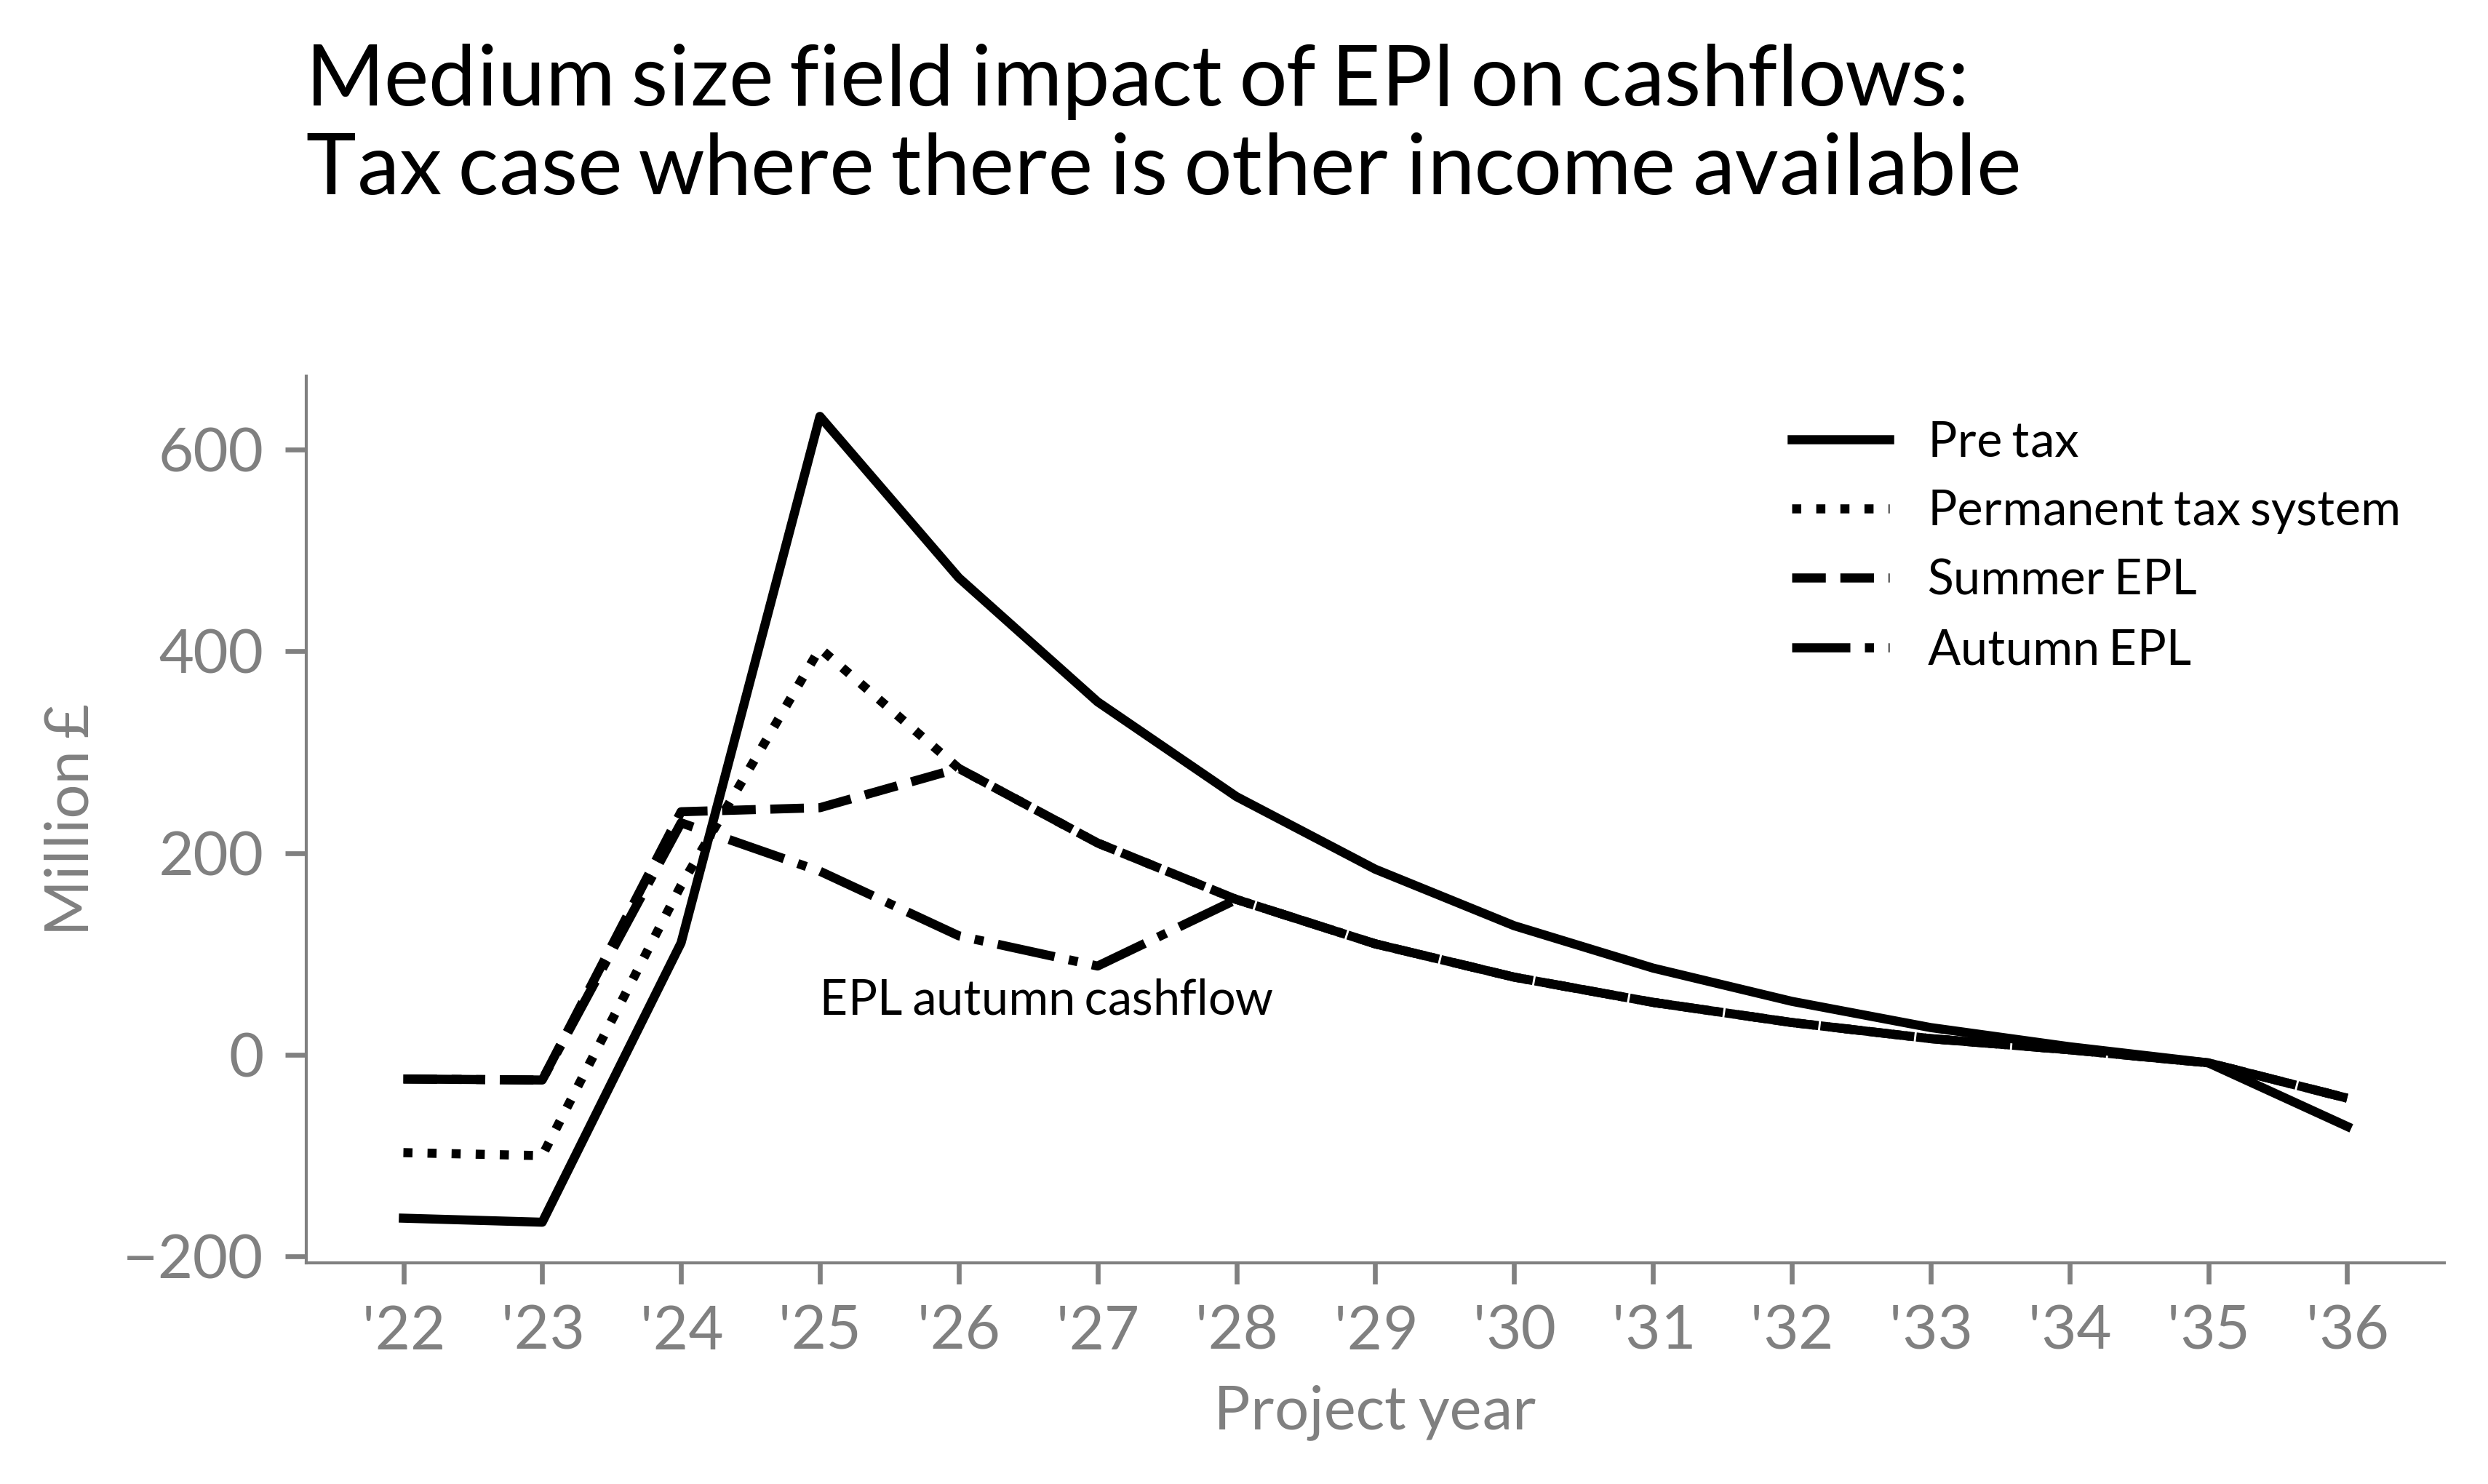

In [8]:
fig, ax =plt.subplots(figsize=(5.8, 3.5), dpi=600, tight_layout=True)
ax.plot(pre_tax, label='Pre tax', c='black')
ax.plot(tax1, label="Permanent tax system", c='black', ls=':')
ax.plot(tax2, label='Summer EPL', c='black', ls='--')
ax.plot(tax3, label='Autumn EPL', c='black', ls='-.')


ax.set_title("Medium size field impact of EPl on cashflows:\nTax case where there is other income available", pad=30, loc='left')
ax.set_xlabel("Project year")
ax.set_ylabel("Million £")

x_labels = np.arange(22, 37, 1)
x_labels = [str("'" + str(year)) for year in x_labels]
plt.xticks(np.arange(0, 15), x_labels)

ax.text(3, 40, "EPL autumn cashflow", fontsize=8)

ax.legend(frameon=False)
plt.show()
